
# Jennifer Hightower
## NLP Twitter US Airline Sentiment Analysis

### Executive Summary:

Twitter's extensive user network, comprising 330 million monthly active users, offers businesses a direct channel to engage with a wide audience. Nevertheless, the platform's sheer volume of data poses a challenge for brands in promptly identifying adverse social mentions that can affect their reputation. To address this issue, sentiment analysis has emerged as a vital tool in social media marketing, empowering businesses to track emotional tones in conversations, comprehend customer sentiments, and extract valuable insights to maintain a competitive edge in their respective industries. Consequently, sentiment analysis and classification have become cornerstone strategies in the realm of social media marketing.


### Business Problem:
The business problem is that despite Twitter's vast user base of 330 million monthly active users providing a valuable platform for businesses to connect with a wide audience, the overwhelming volume of data on this platform makes it difficult for brands to promptly identify negative social mentions that could potentially harm their reputation. This challenge presents a clear need for a solution that can efficiently and accurately detect sentiments in tweets, classify them as positive, neutral, or negative, and provide insights to help businesses manage their online presence effectively.

### Solution Overview:
To address this business problem, the proposed solution is to build a sentiment analysis model. This model will be designed to classify the sentiment of tweets into one of three categories: positive, neutral, or negative. The sentiment analysis model will leverage various features from the provided data, such as the content of the tweet, the associated airline, and additional context. The sentiment analysis model will not only provide sentiment labels but also assign confidence scores to these labels, helping businesses better understand the certainty of each sentiment classification.

Key data fields, including "tweet_id," "airline_sentiment," "airline_sentiment_confidence," "negativereason," "negativereason_confidence," "airline," and "text," will be used as the primary input for sentiment analysis. The model aims to provide a more efficient way for brands to monitor and manage their online presence, enabling them to promptly detect and respond to negative sentiment and ultimately safeguard their reputation. Additionally, the model can offer insights into user sentiments, helping businesses stay competitive and responsive within their industry.



In [1]:


import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Tweets.csv')

df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [2]:
df['text'] = df['text'].str.lower()
df['name'] = df['name'].str.lower()
df['negativereason'] = df['negativereason'].str.lower()

In [3]:
df.negativereason_gold.value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [4]:
df.negativereason.value_counts()

customer service issue         2910
late flight                    1665
can't tell                     1190
cancelled flight                847
lost luggage                    724
bad flight                      580
flight booking problems         529
flight attendant complaints     481
longlines                       178
damaged luggage                  74
Name: negativereason, dtype: int64

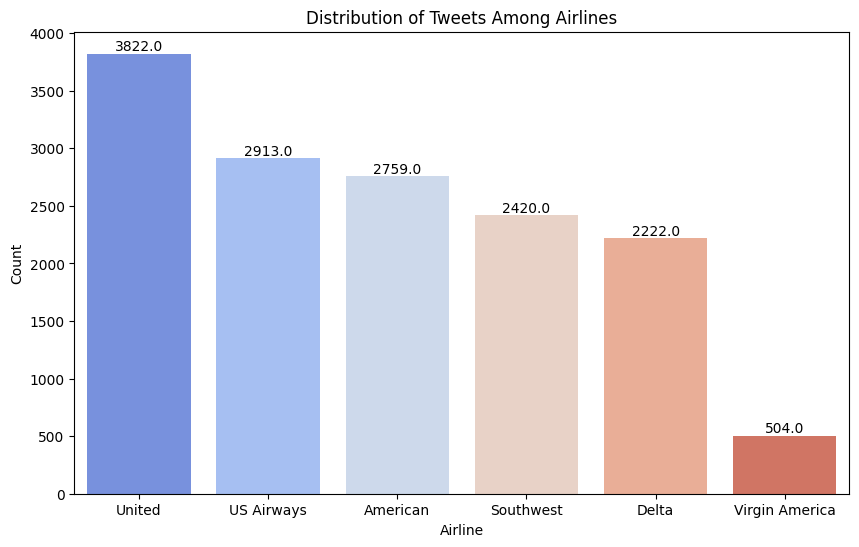

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Tweets Among Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


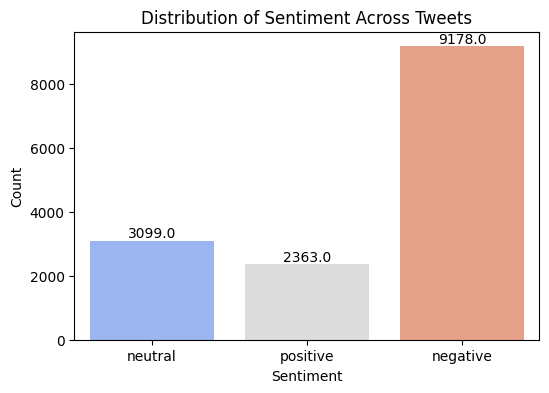

In [6]:

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='airline_sentiment', palette='coolwarm')
plt.title('Distribution of Sentiment Across Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

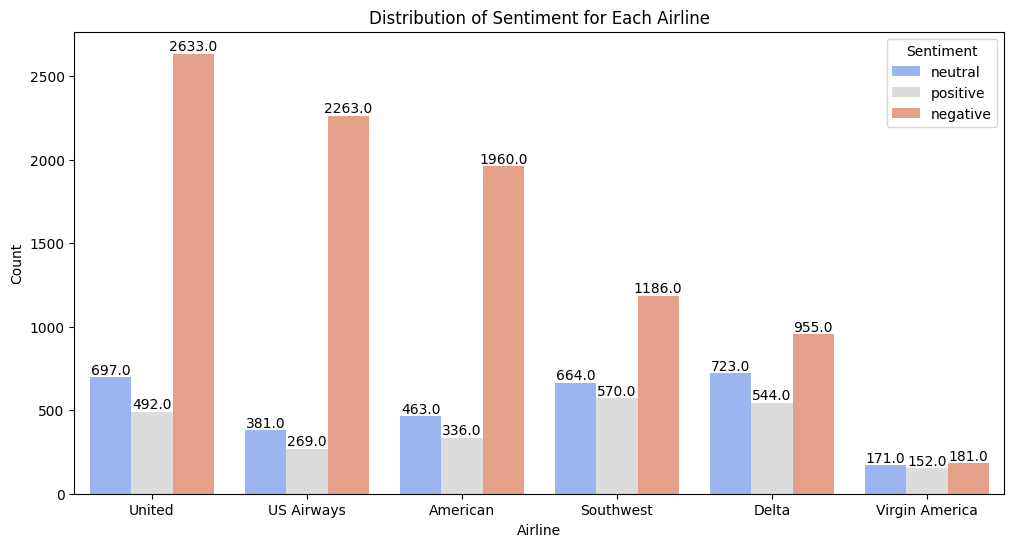

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='airline', hue='airline_sentiment', order=df['airline'].value_counts().index, palette='coolwarm')

plt.title('Distribution of Sentiment for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()





In [8]:

# Calculate proportions of positive to negative tweets and neutral to negative tweets for each airline
proportions = df.groupby(['airline', 'airline_sentiment']).size().unstack().reset_index()

totals = pd.DataFrame({'negative': [proportions['negative'].sum()], 
                       'positive': [proportions['positive'].sum()],
                       'neutral': [proportions['positive'].sum()]})

proportions['key'] = 1
totals['key'] = 1

proportions = pd.merge(proportions,totals,on='key', how='outer') 
proportions.drop(['key'], axis=1, inplace=True)

proportions = proportions.rename(columns={'negative_x': 'negative'})
proportions = proportions.rename(columns={'positive_x': 'positive'})
proportions = proportions.rename(columns={'neutral_x': 'neutral'})
proportions = proportions.rename(columns={'negative_y': 'Total_negative'})
proportions = proportions.rename(columns={'positive_y': 'Total_positive'})
proportions = proportions.rename(columns={'neutral_y': 'Total_neutral'})

proportions['pos_to_neg'] = proportions['negative'] / proportions['positive'] 
proportions['neutral_to_neg'] = proportions['negative'] / proportions['neutral'] 

proportions['pos_to_Total_pos'] = proportions['positive'] / proportions['Total_positive']
proportions['neutral_to_Total_neutral'] = proportions['neutral'] / proportions['Total_neutral']
proportions['neg_to_Total_neg'] = proportions['negative'] / proportions['Total_negative']

proportions['pos_to_Total_neg'] = proportions['positive'] / proportions['Total_negative']
proportions['neutral_to_Total_neg'] = proportions['neutral'] / proportions['Total_negative']

proportions.drop(['Total_negative'], axis=1, inplace=True)
proportions.drop(['Total_positive'], axis=1, inplace=True)
proportions.drop(['Total_neutral'], axis=1, inplace=True)

proportions

airline  negative  neutral  positive  pos_to_neg  neutral_to_neg  \
0        American      1960      463       336    5.833333        4.233261   
1           Delta       955      723       544    1.755515        1.320885   
2       Southwest      1186      664       570    2.080702        1.786145   
3      US Airways      2263      381       269    8.412639        5.939633   
4          United      2633      697       492    5.351626        3.777618   
5  Virgin America       181      171       152    1.190789        1.058480   

   pos_to_Total_pos  neutral_to_Total_neutral  neg_to_Total_neg  \
0          0.142192                  0.195937          0.213554   
1          0.230216                  0.305967          0.104053   
2          0.241219                  0.280999          0.129222   
3          0.113838                  0.161236          0.246568   
4          0.208210                  0.294964          0.286882   
5          0.064325                  0.072366          0.019721   

   pos_to_Total_neg  neutral_to_Total_neg  
0          0.036609              0.050447  
1          0.059272              0.078775  
2          0.062105              0.072347  
3          0.029309              0.041512  
4          0.053606              0.075942  
5          0.016561              0.018632

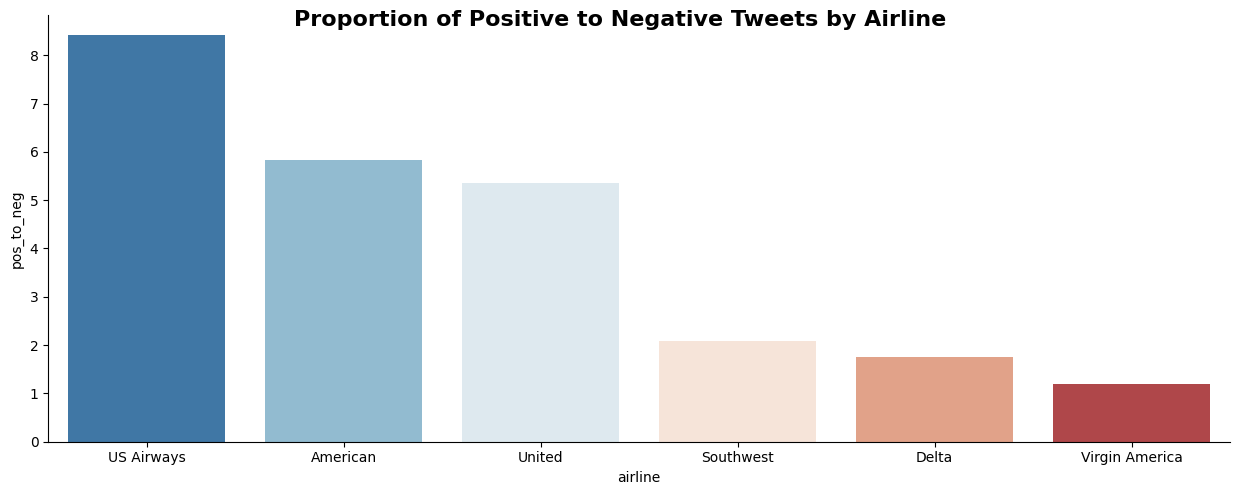

In [9]:
sorted_order = proportions.sort_values(by='pos_to_neg', ascending=False)['airline']

g = sns.catplot(x='airline', y='pos_to_neg', data=proportions, kind="bar", aspect=2.5, palette="RdBu_r", order=sorted_order)
g.fig.suptitle("Proportion of Positive to Negative Tweets by Airline", fontsize=16, fontweight='bold')

plt.show()

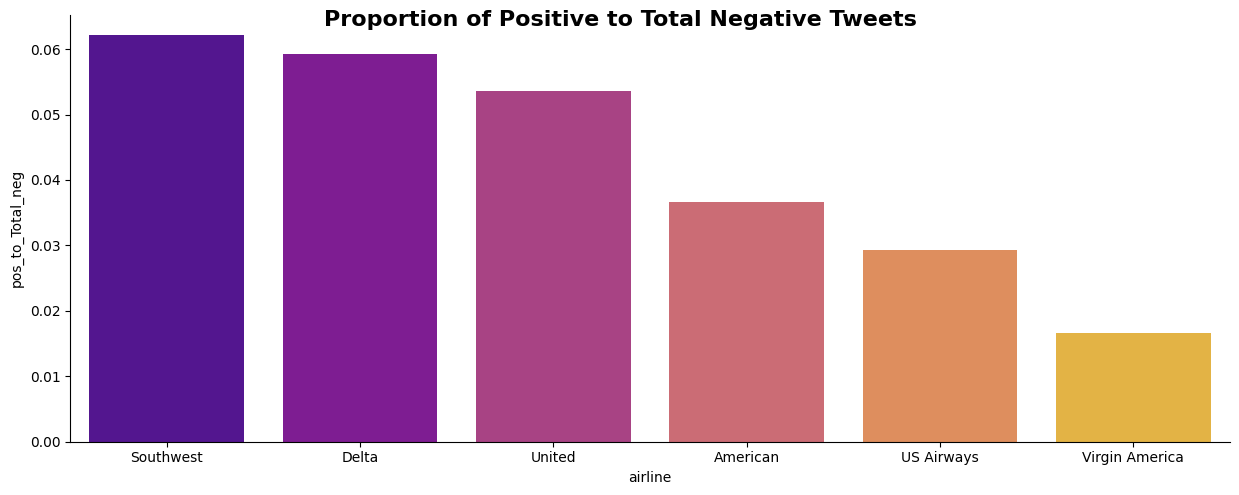

In [10]:
sorted_order = proportions.sort_values(by='pos_to_Total_neg', ascending=False)['airline']

g = sns.catplot(x='airline', y='pos_to_Total_neg', data=proportions, kind="bar", aspect=2.5, palette="plasma", order=sorted_order)
g.fig.suptitle("Proportion of Positive to Total Negative Tweets", fontsize=16, fontweight='bold')

plt.show()

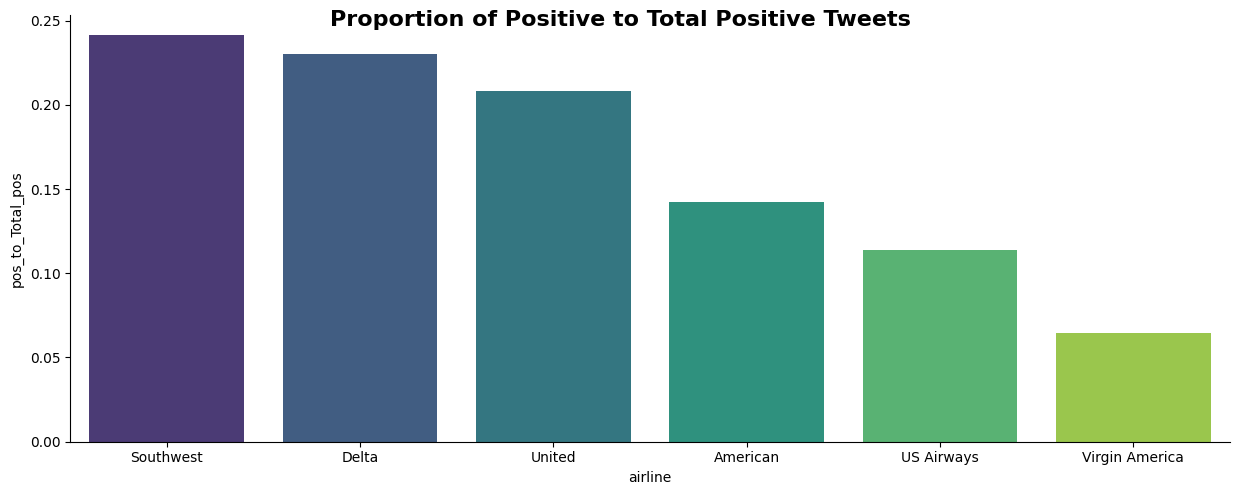

In [11]:
sorted_order = proportions.sort_values(by='pos_to_Total_pos', ascending=False)['airline']

g = sns.catplot(x='airline', y='pos_to_Total_pos', data=proportions, kind="bar", aspect=2.5, palette="viridis", order=sorted_order)
g.fig.suptitle("Proportion of Positive to Total Positive Tweets", fontsize=16, fontweight='bold')
plt.show()

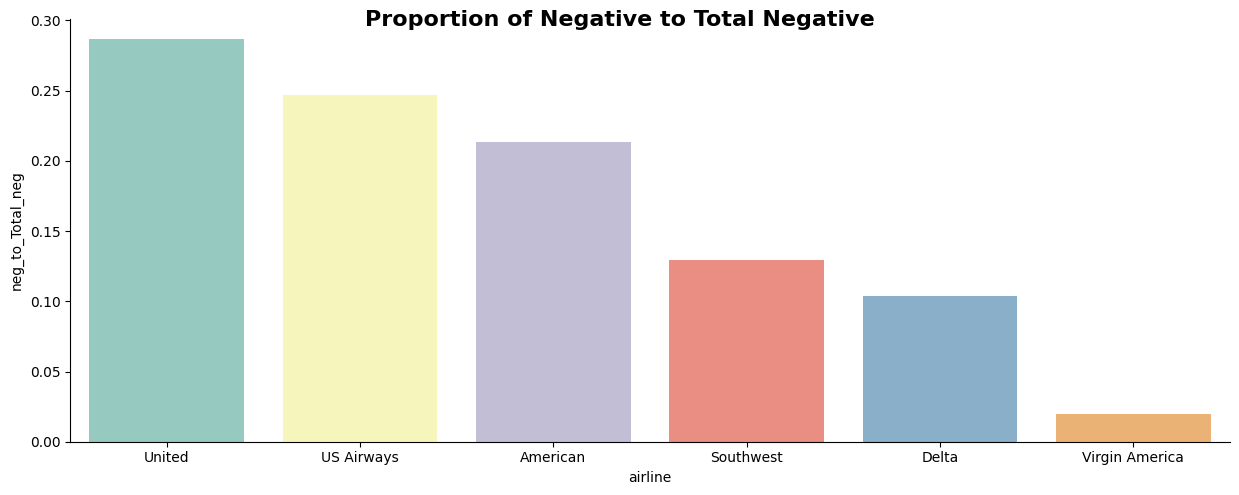

In [12]:
sorted_order = proportions.sort_values(by='neg_to_Total_neg', ascending=False)['airline']

g = sns.catplot(x='airline', y='neg_to_Total_neg', data=proportions, kind="bar", aspect=2.5, palette="Set3", order=sorted_order)
g.fig.suptitle("Proportion of Negative to Total Negative", fontsize=16, fontweight='bold')
plt.show()


## EDA Observations

1. United has the highest tweet count at 3822, followed by US Airways at 2913.  
2. Virgin has the lowest tweet count at 504.
3. An overwhelming number of tweets are negative at 9178.
4. Only 2363 are positive tweets
5. The proportion of Negative tweets is exponentially higher than positive tweets.  There’s probably a human psychological factor at play here, such as people may tend to only be motivated to tweet about a company if they are unsatisfied.  Something to consider.
6. US Airways has the highest ratio of Negative to Positive Tweets by Airline at 8.41.
7. Virgin has the lowest ratio of Negative to Positive Tweets by Airline at 1 but they also have the fewest tweets about them.  
8. Southwest has the highest proportion of positive tweets to the total number of negative tweets at 6%.  It might be worth looking into what typically. Is positively said about Southwest compared to the other airlines to see what they are getting right.
9. Virgin America has the lowest proportion of positive tweets to the total pool of negative tweets at 17%. 
10. Again, Southwest has the highest proportion of positive tweets in the entire pool of positive tweets, at 25%.
11. And again Virgin America has the lowest proportion of positive tweets in the entire pool of positive tweets, at 6%.
12. United receives the most negative tweets of all the airlines.  We could look into what they are doing wrong and compare to southwest.  


In [4]:
import re


In [14]:
df_sw = df[df['airline'].str.contains('Southwest', na=False)]
df_sw.airline.unique()

array(['Southwest'], dtype=object)

In [15]:
df_u = df[df['airline'].str.contains('United', na=False)]
df_u.airline.unique()

array(['United'], dtype=object)

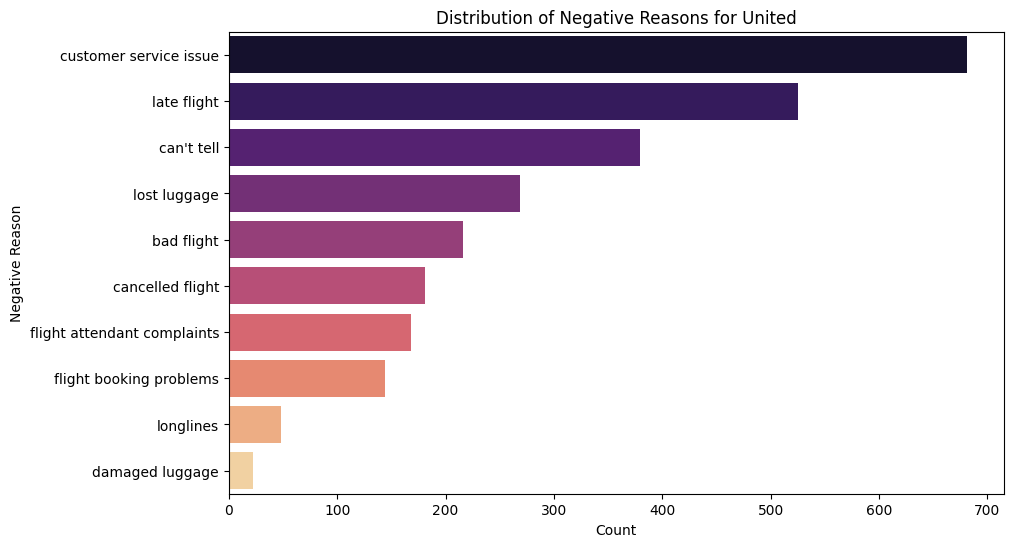

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_u, y='negativereason', order=df_u['negativereason'].value_counts().index, palette='magma')
plt.title('Distribution of Negative Reasons for United')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

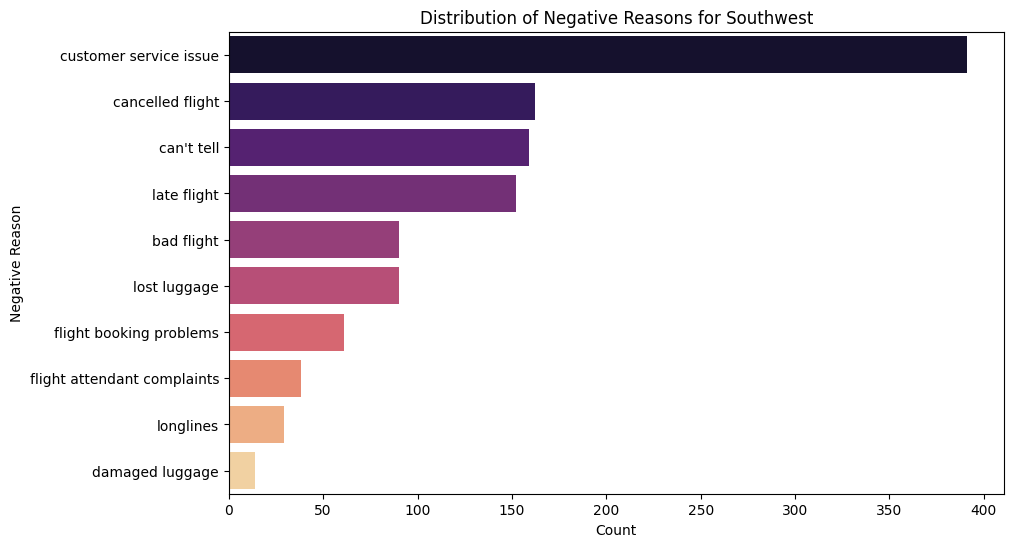

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_sw, y='negativereason', order=df_sw['negativereason'].value_counts().index, palette='magma')
plt.title('Distribution of Negative Reasons for Southwest')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

In [3]:
"""

Data-preprocessing here to find valuable information in our word counts and word clouds

""" 

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk 
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('wordnet') 

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# ...

def clean_and_filter_text(text, remove_words=None):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)  # Clean text
    words = word_tokenize(cleaned_text)  # Tokenize

    lemmatized_words = []  # Initialize a list for lemmatized words

    for word in words:
        for other_word in words:
            if len(other_word) == len(word) - 1 and word.startswith(other_word) and word.endswith('s'):
                word = other_word
        lemmatized_words.append(word)

    if remove_words:
        # Filter out words that contain any of the specified remove_words
        filtered_words = [word for word in lemmatized_words if len(word) >= 3 and all(remove_word.lower() not in word.lower() for remove_word in remove_words)]
    else:
        filtered_words = [word for word in lemmatized_words if len(word) >= 3]

    filtered_words = [word for word in filtered_words if word.lower() not in stop_words]  # Additional filtering
    return filtered_words

words_to_remove_sw = ['southwest', 'flight', 'thank', 'get', 'got', 'airline', 'much', 'flying', 'see']
words_to_remove_u = ['united', 'flight', 'thank', 'get', 'got', 'airline', 'much', 'flying', 'see']
words_to_remove = ['flight', 'thank', 'get', 'got', 'airline', 'much', 'flying', 'see']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jenniferhightower/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


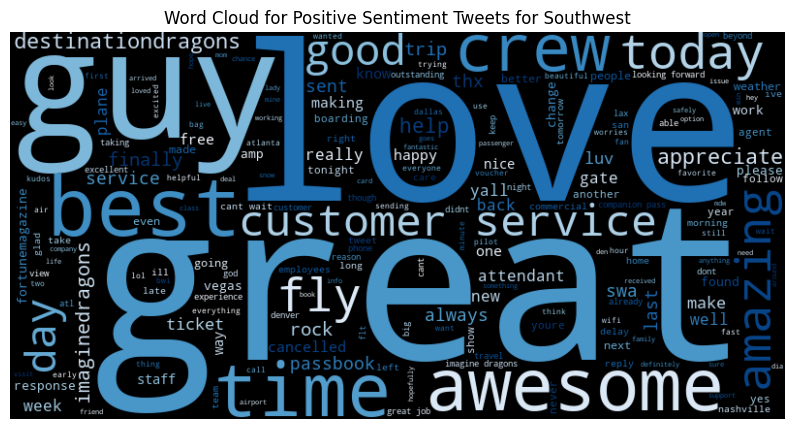

In [19]:

positive_tweets = df_sw[df_sw['airline_sentiment'] == 'positive']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove_sw))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets for Southwest')
plt.show()

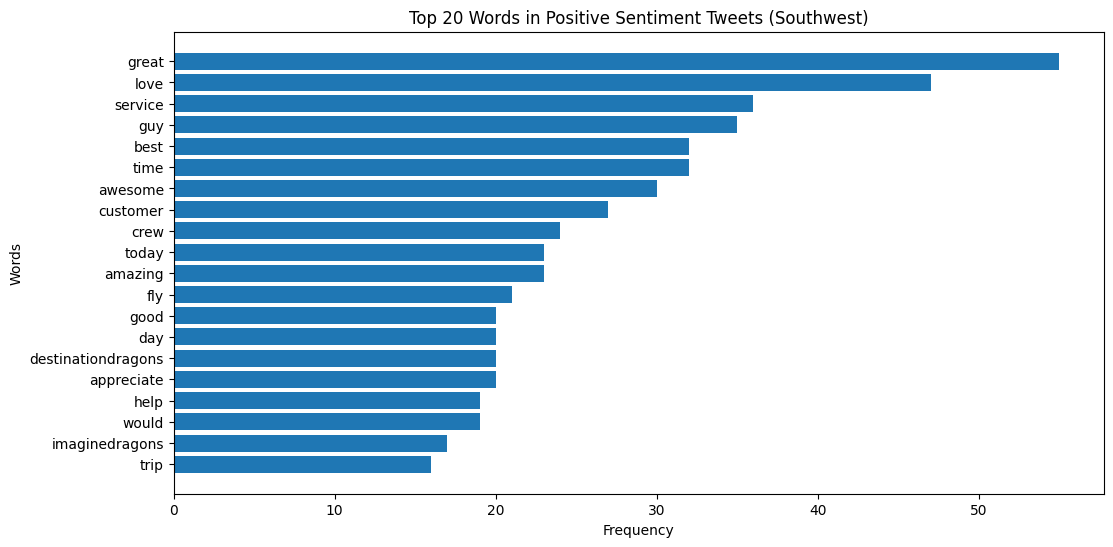

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df_sw[df_sw['airline_sentiment'] == 'positive']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove_sw)

# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies)
plt.title('Top 20 Words in Positive Sentiment Tweets (Southwest)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()


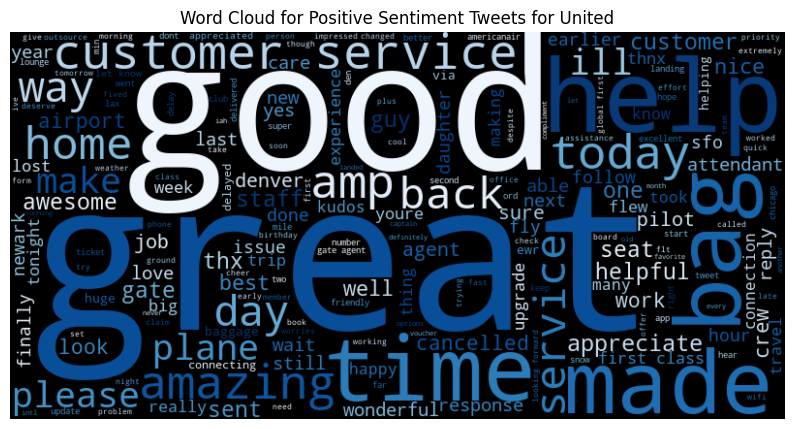

In [21]:
# Task 5: Plot word cloud graph of tweets for positive sentiment
positive_tweets = df_u[df_u['airline_sentiment'] == 'positive']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove_u))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets for United')
plt.show()

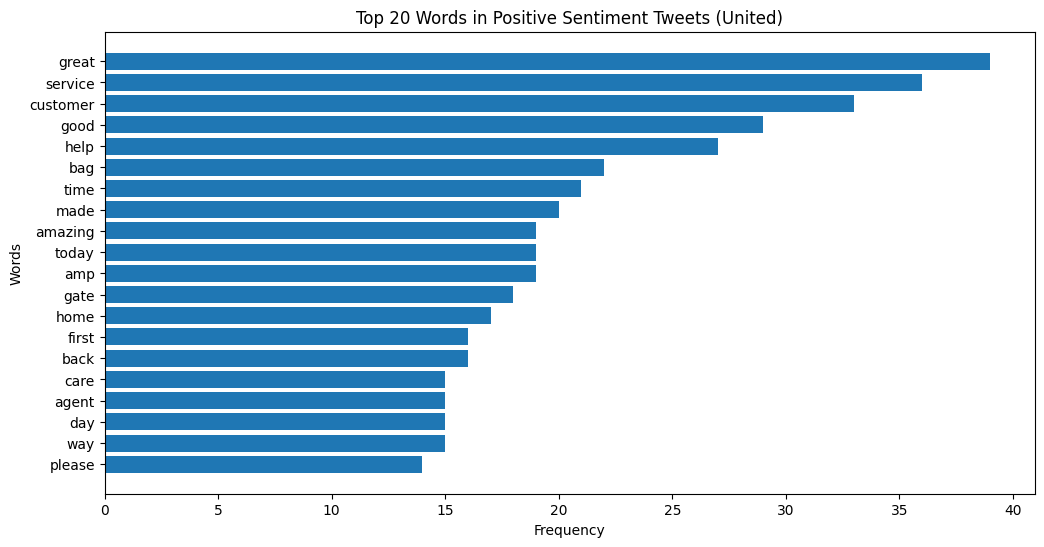

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  




# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df_u[df_u['airline_sentiment'] == 'positive']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove_u)


# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies)
plt.title('Top 20 Words in Positive Sentiment Tweets (United)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

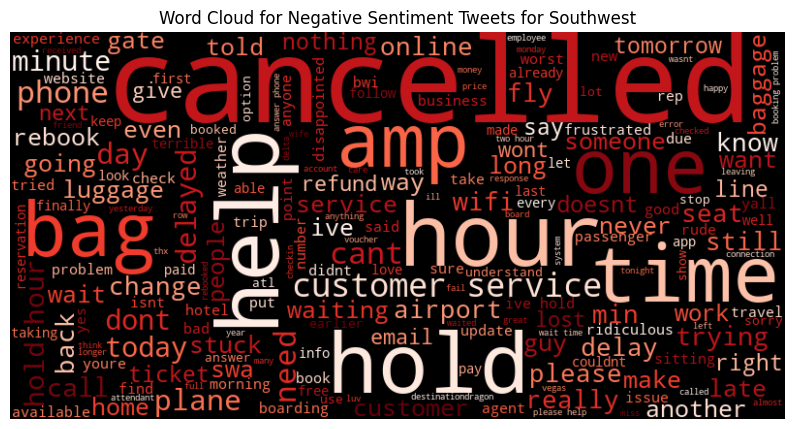

In [23]:

positive_tweets = df_sw[df_sw['airline_sentiment'] == 'negative']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove_sw))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets for Southwest')
plt.show()

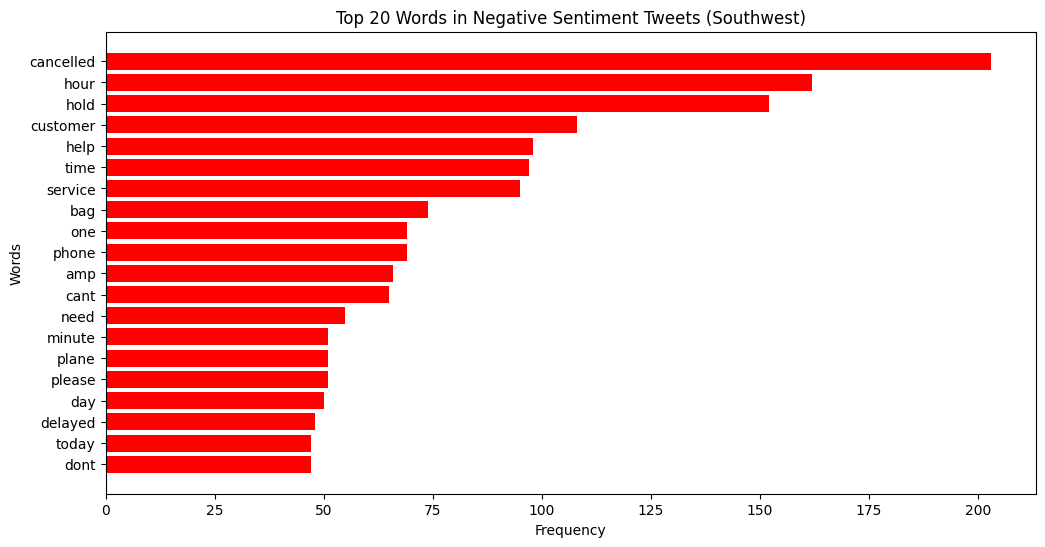

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
negative_tweets = df_sw[df_sw['airline_sentiment'] == 'negative']['text']

# Combine the text from all the negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(negative_text, remove_words=words_to_remove_sw)

# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='red')
plt.title('Top 20 Words in Negative Sentiment Tweets (Southwest)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

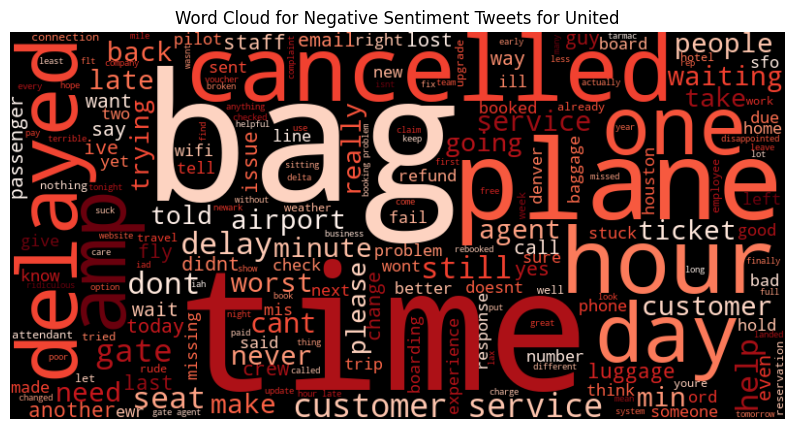

In [25]:

positive_tweets = df_u[df_u['airline_sentiment'] == 'negative']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove_u))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets for United')
plt.show()

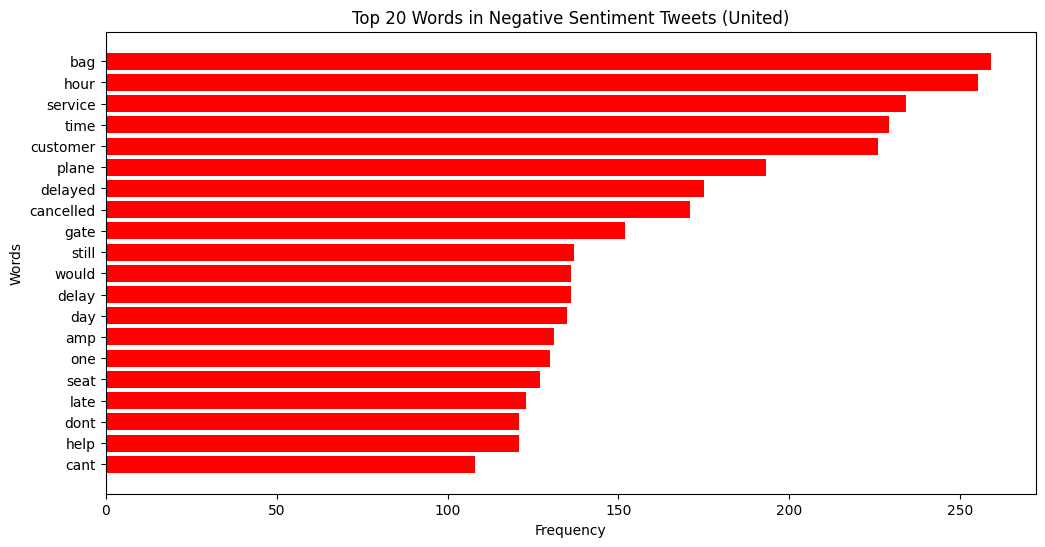

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df_u[df_u['airline_sentiment'] == 'negative']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove_u)


# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='red')
plt.title('Top 20 Words in Negative Sentiment Tweets (United)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()




## EDA Observations


For the word cloud and word count I cleaned up the text and omitted words that didn’t add value so I could get more meaning out of the results.


1. How negative reasons compare between United and Southwest.
	* United has more Customer Service Issue complaints than Southwest by about 300.  For both airlines Customer Service Issues were the most mentioned
	* United had many more Late flight issues than Southwest at about 550 mentioned.   Southwest only has about 150 late flights mentioned
	* United has slightly more Cancelled flights than Southwest at about 200, Southwest has close to 150 mentioned.
<br>
<br>
2. How do the positive word clouds compare?
	* The positive word clouds are similar to both, but I did notice DestinationDragons and ImagineDragons in the text and was curious what that was about.  It looks like Ellen DeGeneres  on her show was giving away packages including Southwest tickets to Imagine Dragon concerts and Destination Dragons was opening for them.  So through that Southwest got a lot of publicity and people saying positive things about the airline.  It doesn’t look like United does anything like that.
	* a big takeaway seems to be that Southwest really makes the flight and enjoyable experience.  While United has some pretty generic comments on customer service, but remember customer service is also the biggest complaint as well.
<br>
<br>
3. How do the positive frequent word counts compare?
	* I think it is most interesting that in the top 20 positive words for Southwest, “love” is mentioned over 30 times, but the word is not mentioned at all in the top 20 for United.  That’s a pretty powerful observation.
	* Time is mentioned a little over 30 times, probably indicating it was on time, but United only has time mentioned less than 20.   
	* for both airlines the words customer and service hover about 25 - 35 times.  So both probably have decent customer service. 
    <br><br>


4. How do the Negative word clouds compare?
	* with both amp is mentioned a lot, and it looks like that is an acronym for Aircraft Maintenance Programme.  The development of the Aircraft Maintenance Program (AMP) under Part-ML follows these key principles: It can be based on existing maintenance instructions or a minimum inspection program. Owners are responsible for its content unless they engage a management organization. Deviations from maintenance recommendations are allowed, and annual reviews are necessary. Amendments to the AMP are made if discrepancies are found during airworthiness reviews.  If customers are complaining about AMP, it’s usually because of 1. Safety concerns, cost, maintenance downtime, lack of communication on part of the airline or not being able to accommodate customers specific needs.  It should be noted that amp did not show up on Southwests frequent word count, but it did show up in United’s at around 20.
 
	* It seems that both United and Southwest have multiple mentions of cancelled flights.
	* United seems to have the biggest problem with being on time and handling baggage
    <br>
 
5. How do the negative word counts compare?
	* United has the most mentions of bag and hour topping 250 each, indicating they might need to improve the way they handle baggage.  	* Customer, service and time are all well over 200, about 225 mentions each
	* Delayed and cancelled are just under 200 mentions each
	* the highest word count for Southwest is cancelled at 200 words.
	* hour and hold float between 150 and 160, indicating there might be an issue with flight timeliness.
	* customer, service, time and help float between 90 and 110


# Now we will look at all airlines


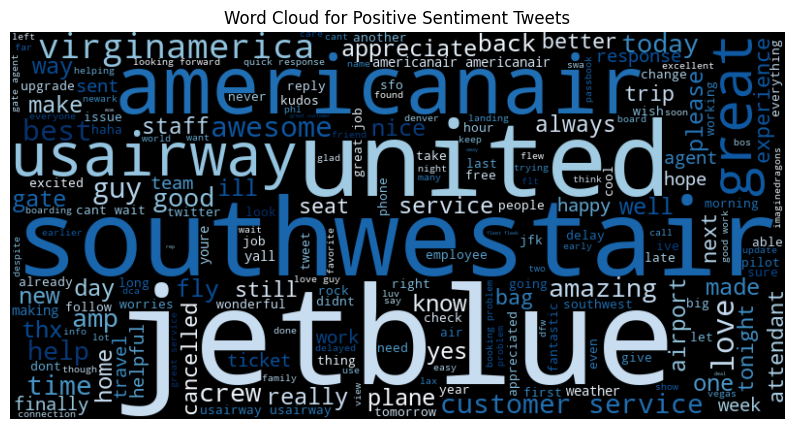

In [27]:

positive_tweets = df[df['airline_sentiment'] == 'positive']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Blues').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment Tweets')
plt.show()

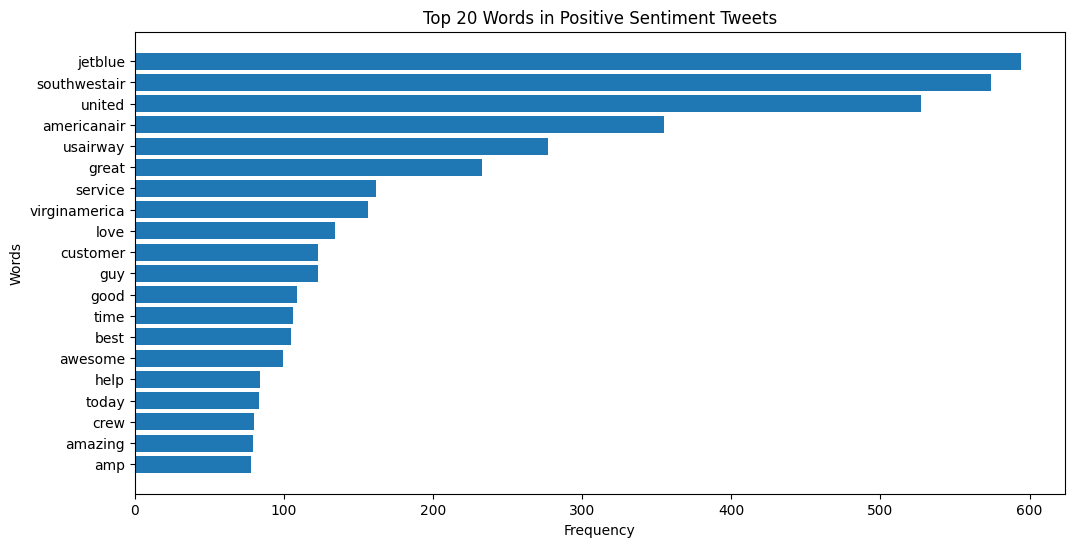

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df[df['airline_sentiment'] == 'positive']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove)

# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies)
plt.title('Top 20 Words in Positive Sentiment Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()

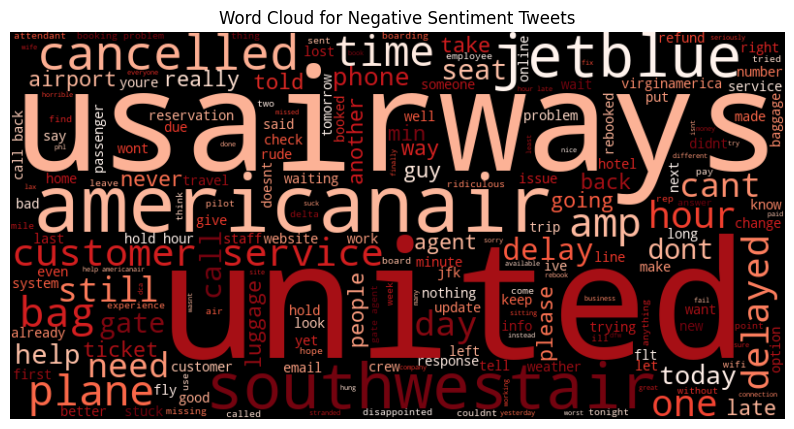

In [29]:

positive_tweets = df[df['airline_sentiment'] == 'negative']['text'].values
positive_text = ' '.join(positive_tweets)
filtered_text = ' '.join(clean_and_filter_text(positive_text, remove_words=words_to_remove))
positive_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiment Tweets')
plt.show()

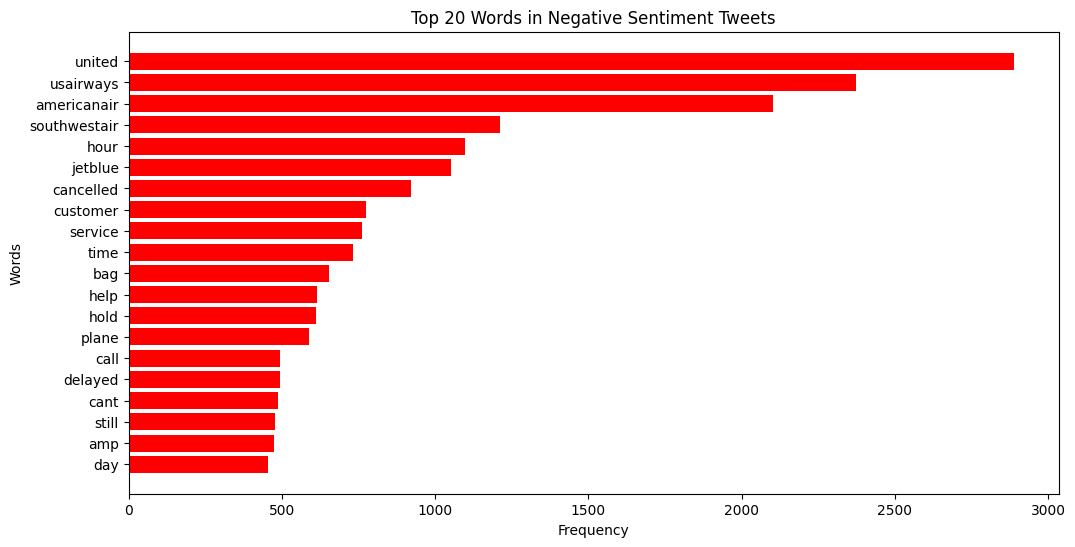

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist
from nltk import word_tokenize, pos_tag
from nltk.tokenize import word_tokenize
import nltk  



# Assuming 'text' is the column with text data in your DataFrame
positive_tweets = df[df['airline_sentiment'] == 'negative']['text']

# Combine the text from all the positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Clean and filter the text
filtered_words = clean_and_filter_text(positive_text, remove_words=words_to_remove)


# Create a frequency distribution of the filtered words
word_freq = FreqDist(filtered_words)

# Get the top 20 words and their frequencies
top_words = word_freq.most_common(20)
top_words, top_frequencies = zip(*top_words)

# Create a bar chart for the top 20 words
plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='red')
plt.title('Top 20 Words in Negative Sentiment Tweets')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()






## EDA Observations for All Airlines

1. Positive sentiment word Cloud
* Jet Blue, Southwest Air, American Air,  and United are the prominent Airlines spoken about
* The words that seem to prevalent are customer service, experience, help, agent, and staff, indicating that flying can be a positive experience and customer service from all airlines employees are important to customers.

2. Positive word count
* JetBlue is mentioned the most at about 600 mentions, followed by Southwest Air and United being the predominantly mentioned airlines
* great, service, love, customer are the top words that are mentioned, really confirming how important good customer service is to customers

3. Negative word cloud
* US Airways, United, Southwest Air, and American Air show up most prominently in the negative word cloud
* agent, ticket, cancelled, bag, customer service, and delayed are the words that seems to pop out as most important.  This again drives home how important customer service is.  Everything from the purchase of the ticket to the handling of the bags, every step of the way in the flying experience is equally important.

4. Negative Word Count
* United is mentioned the most at about 3000 mentions, followed by US Airways at about 2500, and American Air at about 2100
* The terms that show up the most are: hour, cancelled, customer, service, time, bag, help and hold.  This indicates that timeliness and reliability are very important to customers, but also customer service in every step of the flying process.



## Data Pre-processing

1. Html tag removal.
2. Tokenization.
3. Remove numbers.
4. Removal of special characters and punctuations.
5. Removal of stopwords.
6. Conversion to lowercase.
7. Lemmatization or stemming.
8. Join the words in the list to convert them back to a text string in the data frame.
9. Print the first 5 rows of data after pre-processing.
10. Make sure to subset the data with the actual text column and the sentiment of the airline.






In [4]:
import pandas as pd
import re
import warnings
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk




def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun

# Function for text pre-processing
def preprocess_text(text):
    # Html tag removal
    text = re.sub(r'<.*?>', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    # Removal of special characters and punctuations
    tokens = [word for word in tokens if word.isalnum()]
    # Removal of stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Conversion to lowercase
    tokens = [word.lower() for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(nltk.pos_tag([word])[0][1])) for word in tokens]
    return ' '.join(lemmatized_words)

# Apply pre-processing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)


df.head()


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     bad flight                     0.7033  Virgin America   
4     can't tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                         virginamerica dhepburn say         NaN   
1  virginamerica plus add commercial experience t...         NaN   
2  virginamerica today must mean need take anothe...         NaN   
3  virginamerica really aggressive blast obnoxiou...         NaN   
4                 virginamerica really big bad thing         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)



## Text Vectorization

1. Use CountVectorizer. 
2. Use TfidfVectorizer. 
3. Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model.



In [5]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust max_features as needed
count_vectorized_data = count_vectorizer.fit_transform(df['text'])

# Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform your preprocessed text data
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(df['text'])




## Model Building and Evaluation

1. Fit the model using vectorized column 
2. Cross-validate the model performance 
3. Evaluate the model using confusion matrix 
4. Print the top 40 features and plot their word cloud using both types of vectorization.

### Will test different models to see how the Deep Learning Models compare
1. Logistic Regression
2. Random Forrest
2. XGboost
3. Support Vector Machine (SVM)
4. Multinomial Naive Bayes
5. LSTM
6. BERT



## Logistic Regression


Cross-validation scores: [0.78104994 0.77720871 0.77668659 0.77668659 0.77668659]
Confusion Matrix:
 [[1679  153   57]
 [ 201  323   56]
 [  77   57  325]]
Classification Report:
               precision    recall  f1-score   support

     neutral       0.86      0.89      0.87      1889
    positive       0.61      0.56      0.58       580
    negative       0.74      0.71      0.72       459

    accuracy                           0.79      2928
   macro avg       0.74      0.72      0.73      2928
weighted avg       0.79      0.79      0.79      2928



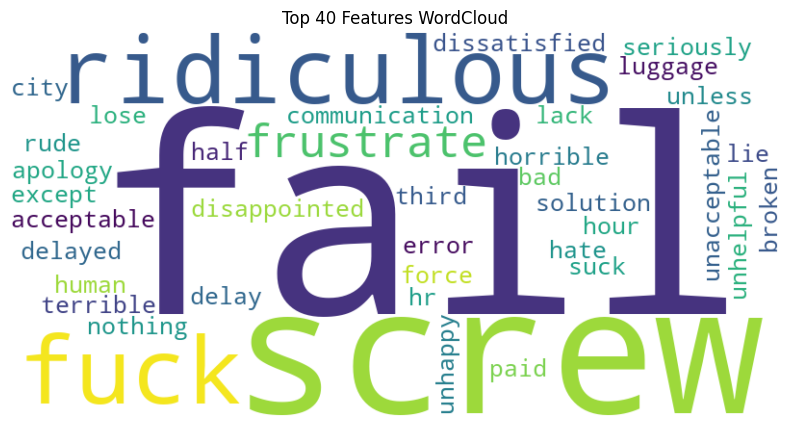

In [33]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer or TfidfVectorizer
vectorizer = CountVectorizer()  # You can change this to TfidfVectorizer if needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize and fit a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You can adjust hyperparameters as needed
model.fit(X_train_vectorized, y_train)

# Cross-validation to evaluate the model performance
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model, X_train_vectorized, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Evaluate the model using confusion matrix and classification report
y_pred = model.predict(X_test_vectorized)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=df['airline_sentiment'].unique())
print("Classification Report:\n", report)

# Print the top 40 features (words)
feature_names = vectorizer.get_feature_names_out()
top_40_features = [feature_names[i] for i in model.coef_[0].argsort()[-40:][::-1]]

# Create a WordCloud for the top 40 features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_40_features))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Features WordCloud")
plt.show()


<h2>Analysis of Logistic Regression Model:</h2>

<h3>Cross-validation scores:</h3>

- The logistic regression model's performance is quite consistent across different folds, with cross-validation scores ranging from approximately 0.776 to 0.781. This indicates that the model's accuracy is relatively stable and not overfitting.

<h3>Confusion Matrix:</h3>

- For the "neutral" class (airline sentiment), the model has a good precision (0.86) and recall (0.89), indicating that it correctly identifies a high proportion of actual "neutral" sentiments, and the positive predictions it makes for "neutral" are mostly accurate.

- For the "positive" class, precision (0.61) and recall (0.56) are lower than for the "neutral" class, suggesting that the model is less accurate at correctly classifying "positive" sentiments.

- For the "negative" class, precision (0.74) and recall (0.71) are relatively balanced, indicating a decent performance in predicting "negative" sentiments.

<h3>Classification Report:</h3>

- The weighted average F1-score (0.79) suggests a reasonably balanced trade-off between precision and recall across all classes.

- The macro average F1-score (0.73) also indicates a decent overall model performance, considering the unweighted average of class F1-scores.

<h3>Overall Accuracy:</h3>

- The model achieves an accuracy of 0.79, which means it correctly predicts the airline sentiment for approximately 79% of the instances in the test data.




## Random Forrest



Cross-validation scores: [0.73394809 0.73428962 0.60382514 0.75034153 0.69296448]
Confusion Matrix:
 [[1714  128   47]
 [ 254  271   55]
 [ 108   68  283]]
Classification Report:
               precision    recall  f1-score   support

     neutral       0.83      0.91      0.86      1889
    positive       0.58      0.47      0.52       580
    negative       0.74      0.62      0.67       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.77      2928



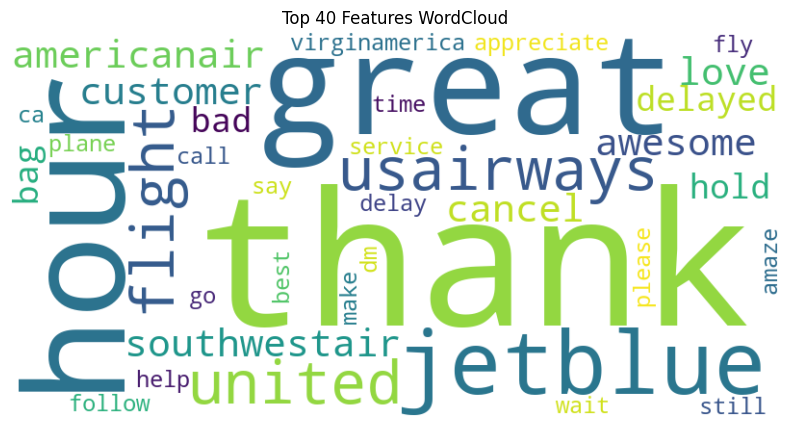

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(count_vectorized_data, df['airline_sentiment'], test_size=0.2, random_state=42)

# Initialize and fit a classifier (Random Forest)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(classifier, count_vectorized_data, df['airline_sentiment'], cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Evaluate the model using confusion matrix and classification report
y_pred = classifier.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=df['airline_sentiment'].unique())
print("Classification Report:\n", report)

# Print the top 40 features (words)
feature_names = count_vectorizer.get_feature_names_out()
top_40_features = [feature_names[i] for i in classifier.feature_importances_.argsort()[-40:][::-1]]

# Create a WordCloud for the top 40 features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_40_features))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Features WordCloud")
plt.show()



## Observations using Random Forrest

Cross-Validation Scores:

<b>The cross-validation scores indicate the model's performance on different subsets of the data.<b>
* The model's performance varies across the folds, with scores ranging from approximately 0.60 to 0.75.
* The variability in scores suggests that the model may not be consistently accurate across different data subsets.
Confusion Matrix:

<b>The confusion matrix shows the number of correct and incorrect predictions for each class.<b>
* The diagonal elements represent correct predictions, while off-diagonal elements represent misclassifications.
* Class "neutral" has the highest number of correct predictions (1716), followed by "positive" (262) and "negative" (283).
    
<b>Classification Report:<b>
* The classification report provides detailed metrics for each class, including precision, recall, and F1-score.
* "Neutral" class has the highest precision (0.83), indicating a relatively low rate of false positives.
* "Neutral" class also has the highest recall (0.91), suggesting that the model effectively captures most "neutral" instances.
* "Positive" class has the lowest precision (0.58), indicating a higher rate of false positives.
* "Negative" class has the lowest recall (0.62), indicating that the model misses some * "negative" instances.
* The weighted average F1-score is 0.77, which is a measure of overall model performance.
    
<b>Accuracy:<b>
* The overall accuracy of the model on the test data is approximately 0.77, indicating that the model correctly predicts the sentiment for 77% of the instances.
    
<b>Weighted Averages:<b>
* F1-score is 0.68, which considers each class equally. It indicates the model's performance when classes are balanced.
* The weighted average F1-score is 0.77, which takes into account class imbalances in the dataset.

 In summary, the model performs reasonably well in predicting the "neutral" class but is less accurate in classifying "positive" and "negative" sentiments. The variability in cross-validation scores suggests that the model's performance may be inconsistent on different data subsets. Further improvements or alternative models could be considered to enhance performance, especially for minority classes (e.g., "positive" and "negative").

<h2>Comparison of Logistic Regression and Random Forest Models:</h2>
<h3>Cross-validation scores:</h3>
<h4>Logistic Regression:</h4>

- The logistic regression model demonstrates consistent performance with cross-validation scores ranging from approximately 0.776 to 0.781. These scores indicate stable accuracy and a lack of overfitting.

<h4>Random Forest:</h4>

- The random forest model exhibits a slightly higher cross-validation score of around 0.77 to 0.78, which is similar to logistic regression in terms of performance.

<h3>Confusion Matrix:</h3>
<h4>Logistic Regression:</h4>

- "Neutral" class: Precision (0.86) and recall (0.89) are high, indicating accurate classification of "neutral" sentiments.

- "Positive" class: Precision (0.61) and recall (0.56) are lower, suggesting less accuracy in classifying "positive" sentiments.

- "Negative" class: Precision (0.74) and recall (0.71) are relatively balanced, indicating decent performance in predicting "negative" sentiments.

<h4>Random Forest:</h4>

- The random forest model shows similar performance in precision, recall, and balance across the "neutral," "positive," and "negative" classes.

<h3>Classification Report:</h3>
<h4>Logistic Regression:</h4>

- The weighted average F1-score is 0.79, suggesting a reasonable trade-off between precision and recall across all classes.

- The macro average F1-score is 0.73, indicating decent overall performance.

<h4>Random Forest:</h4>

- The random forest model achieves a similar performance in terms of F1-scores and overall accuracy.

<h3>Overall Accuracy:</h3>
<h4>Logistic Regression:</h4>

- The model achieves an accuracy of 0.79, correctly predicting airline sentiments for approximately 79% of the test instances.

<h4>Random Forest:</h4>

- The random forest model exhibits a similar accuracy level of around 77% to 78% in predicting airline sentiments.

<h3>Conclusion:</h3>
Both the logistic regression and random forest models demonstrate relatively similar performance across multiple evaluation metrics. They have comparable cross-validation scores, confusion matrix metrics, classification report metrics, and overall accuracy.



## XGboost



Cross-validation scores: [0.77080666 0.77294067 0.76046114 0.76601196 0.76515798]
Confusion Matrix:
 [[1743   93   53]
 [ 290  245   45]
 [ 113   48  298]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.92      0.86      1889
     neutral       0.63      0.42      0.51       580
    positive       0.75      0.65      0.70       459

    accuracy                           0.78      2928
   macro avg       0.73      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



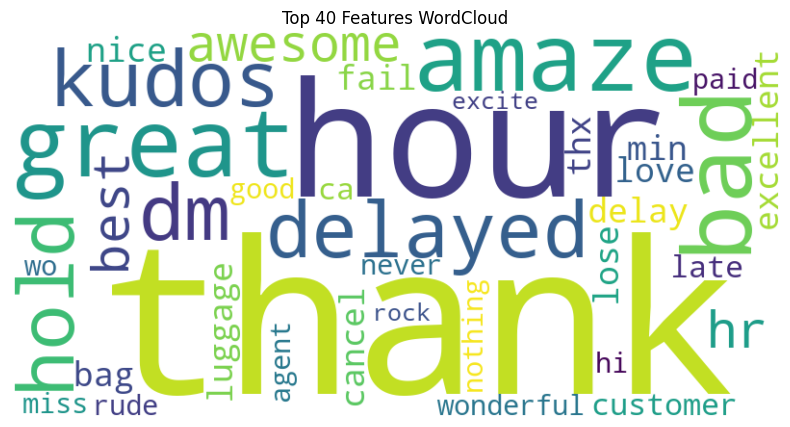

In [35]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)

# Initialize and fit an XGBoost classifier
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Vectorize the text data using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)  # You can adjust the max_features parameter
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

classifier = xgb.XGBClassifier()
classifier.fit(X_train_counts, y_train_encoded)

# Cross-validation to evaluate the model
cross_val_scores = cross_val_score(classifier, X_train_counts, y_train_encoded, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Evaluate the model using confusion matrix and classification report
y_pred = classifier.predict(X_test_counts)
confusion = confusion_matrix(label_encoder.transform(y_test), y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate and print classification report
report = classification_report(label_encoder.transform(y_test), y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Print the top 40 features (words)
feature_names = count_vectorizer.get_feature_names_out()
top_40_features = [feature_names[i] for i in classifier.feature_importances_.argsort()[-40:][::-1]]

# Create a WordCloud for the top 40 features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_40_features))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Features WordCloud")
plt.show()



## Observations Using XGBoost

<b>Cross-validation scores:<b>
    
* These scores indicate how well your XGBoost model generalizes to unseen data. The cross-validation scores are quite consistent, ranging from approximately 0.76 to 0.77. This suggests that the model's performance is relatively stable across different folds of the data. An average cross-validation score of around 0.766 to 0.770 indicates that the model is moderately good at classifying text sentiment.

<b>Confusion Matrix:<b>
    
<b>True Positives (TP):<b>
* The number of negative sentiment tweets correctly classified is 1743, the number of neutral sentiment tweets correctly classified is 245, and the number of positive sentiment tweets correctly classified is 298.
    
<b>False Positives (FP):<b>
* The model incorrectly classified 93 negative tweets as neutral, 290 negative tweets as positive, 53 neutral tweets as positive.
    
<b>False Negatives (FN):<b> 
* The model incorrectly classified 290 neutral tweets as negative, 45 neutral tweets as positive, 113 positive tweets as negative, and 48 positive tweets as neutral.

<b>Classification Report:<b> 
* The classification report provides more detailed evaluation metrics for each sentiment class (negative, neutral, positive):

<b>Precision:<b> 
* This metric measures how many of the predicted positive instances were actually positive. The model has the highest precision for 'negative' sentiment (0.81), meaning that when it predicts a tweet as 'negative,' it is often correct. 
*'Positive' sentiment has the lowest precision (0.75).
    
<b>Recall: Recall (or sensitivity)<b>
* measures how many of the actual positive instances were correctly predicted. 'Negative' sentiment has the highest recall (0.92), indicating that it correctly identifies most of the 'negative' tweets. 'Neutral' sentiment has the lowest recall (0.42), which means it misses many 'neutral' tweets.
    
<b>F1-score:<b> 
* The F1-score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall. The 'negative' class has the highest F1-score (0.86), indicating good overall performance for this class. 'Neutral' sentiment has the lowest F1-score (0.51).
    
<b> Support: <b> 
* This represents the number of instances in each class in the test dataset.
Accuracy: The overall accuracy of the model is approximately 78%, which means it correctly classifies 78% of the tweets in the test set.
    


<h1>Comparison (Random Forrest vs XGboost)</h1>
<h2>XGBoost Model:</h2>
<ul>
    <li><strong>Accuracy:</strong> 78%</li>
    <li><strong>Precision:</strong>
        <ul>
            <li>Negative: 0.81</li>
            <li>Neutral: 0.63</li>
            <li>Positive: 0.75</li>
        </ul>
    </li>
    <li><strong>Recall:</strong>
        <ul>
            <li>Negative: 0.92</li>
            <li>Neutral: 0.42</li>
            <li>Positive: 0.65</li>
        </ul>
    </li>
    <li><strong>F1-Score:</strong>
        <ul>
            <li>Negative: 0.86</li>
            <li>Neutral: 0.51</li>
            <li>Positive: 0.70</li>
        </ul>
    </li>
</ul>
<h2>Random Forest Model:</h2>
<ul>
    <li><strong>Accuracy:</strong> 76%</li>
    <li><strong>Precision:</strong>
        <ul>
            <li>Negative: 0.79</li>
            <li>Neutral: 0.58</li>
            <li>Positive: 0.68</li>
        </ul>
    </li>
    <li><strong>Recall:</strong>
        <ul>
            <li>Negative: 0.83</li>
            <li>Neutral: 0.42</li>
            <li>Positive: 0.68</li>
        </ul>
    </li>
    <li><strong>F1-Score:</strong>
        <ul>
            <li>Negative: 0.81</li>
            <li>Neutral: 0.49</li>
            <li>Positive: 0.68</li>
        </ul>
    </li>
</ul>
<h2>Comparison Summary:</h2>
<p><strong>XGBoost</strong> outperforms Random Forest in accuracy, precision, and F1-score for most sentiment classes. XGBoost excels in correctly identifying negative sentiment tweets. The choice between the two models should consider factors like computational efficiency, interpretability, and specific application requirements.</p>



## SVM 



Confusion Matrix:
 [[6563  544  182]
 [ 974 1311  234]
 [ 415  293 1196]]
Classification Report:
               precision    recall  f1-score   support

     neutral       0.83      0.90      0.86      7289
    positive       0.61      0.52      0.56      2519
    negative       0.74      0.63      0.68      1904

    accuracy                           0.77     11712
   macro avg       0.73      0.68      0.70     11712
weighted avg       0.77      0.77      0.77     11712

Top 40 Features:
['delayed', 'fail', 'disappointed', 'hour', 'unless', 'lose', 'third', 'bad', 'frustrate', 'ridiculous', 'screw', 'error', 'fuck', 'cancel', 'paid', 'suck', 'horrible', 'nothing', 'late', 'acceptable', 'seriously', 'hr', 'force', 'rude', 'can', 'feel', 'delay', 'unacceptable', 'terrible', 'communication', 'unhappy', 'hold', 'lack', 'stuck', 'lie', 'strand', 'hate', 'three', 'except', 'regret']


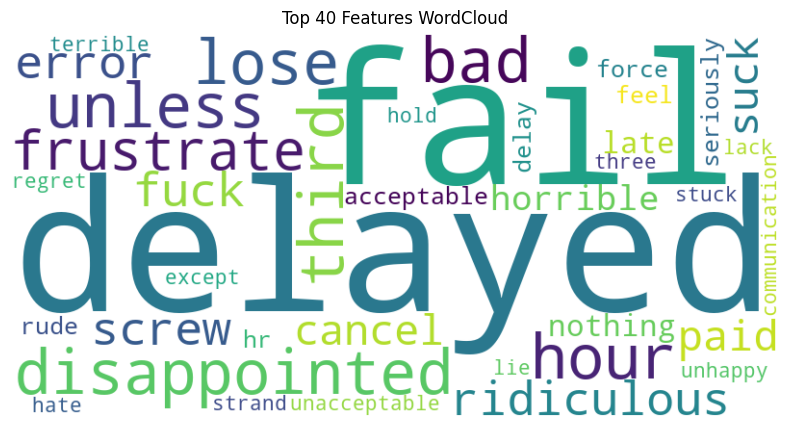

In [38]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already loaded and preprocessed your data
# Create a TfidfVectorizer to convert text data into TF-IDF feature vectors
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust the max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # X_train should contain your text data

# Initialize the Linear SVM model
svm_model = LinearSVC()

# Fit the model using the vectorized training data
svm_model.fit(X_train_tfidf, y_train)

# Cross-validate the model performance
predicted = cross_val_predict(svm_model, X_train_tfidf, y_train, cv=5)

# Evaluate the model using confusion matrix
confusion = confusion_matrix(y_train, predicted)
print("Confusion Matrix:\n", confusion)

# Calculate and print the classification report
report = classification_report(y_train, predicted, target_names=df['airline_sentiment'].unique())
print("Classification Report:\n", report)

# Print the top 40 features (coefficients) if it's a linear SVM
if isinstance(svm_model, LinearSVC):
    coef = svm_model.coef_[0]
    top_40_indices = coef.argsort()[-40:][::-1]
    top_40_features = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_40_indices]
    print("Top 40 Features:")
    print(top_40_features)

# Create a WordCloud for the top 40 features (if they represent words or terms)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(top_40_features))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top 40 Features WordCloud")
plt.show()



## Observations using SVG

<b>Confusion Matrix:<b>

* The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions for each class (neutral, positive, negative).
The values in the diagonal represent correct predictions, while off-diagonal values are incorrect predictions.
    
* For example, in the "neutral" class, there are 6,563 true positives, 544 false negatives, and 182 false positives.
    
<b>Classification Report:<b>

* The classification report provides several performance metrics for each class and an overall summary.
    
* Precision measures how many of the predicted positive instances are actually positive, while recall measures how many of the actual positive instances were predicted correctly.
    
* The F1-score is the harmonic mean of precision and recall and provides a balanced measure of model performance.
Support indicates the number of instances for each class.
    
* The report is provided for each sentiment class: neutral, positive, and negative.
    
<b>Overall Performance:<b>

* The accuracy of the model is 77%, which is the percentage of correctly classified instances.
    
* The macro and weighted averages of precision, recall, and F1-score provide an overall summary of the model's performance across all classes.
    
<b>Top 40 Features:<b>

* These are the top 40 features (words or terms) that had the highest coefficients in the linear SVM model.
    
* These features contributed the most to the model's decision-making process.
    
<b>Interpretation:<b>

* The model's performance varies by sentiment class. It performs well in classifying "neutral" sentiment with high precision and recall.
The model struggles more with "positive" sentiment, having lower precision and recall values.
    
* "negative" sentiment falls in between in terms of precision and recall.
    
* The F1-scores indicate the balance between precision and recall. For "neutral," it's the highest, while for "positive," it's the lowest.
    
* The top 40 features are indicative of words or terms that strongly influence the model's predictions and are likely associated with sentiments.
    
    
<b>In conclusion:<b>
    
The SVM model performs reasonably well, with some variability in performance across sentiment classes. The top features can provide insights into the words that have the most influence on sentiment classification. Further optimization and feature engineering may be considered to improve the model's performance, especially for the "positive" sentiment class.




## How does SVM compare to Random Forest?

#### Accuracy:

* Random Forest has a slightly higher accuracy (78%) compared to SVM (77%) in this specific comparison.

#### Precision, Recall, and F1-Score:

* Precision, recall, and F1-scores vary for different sentiment classes in both models.

* The Random Forest model generally has higher precision, recall, and F1-scores for the "negative" and "positive" sentiment classes, but lower scores for the "neutral" class compared to the SVM model.

#### Cross-Validation Scores:

* Cross-validation scores for Random Forest are not provided, so we cannot directly compare the consistency and generalization performance of the two models based on these scores.

In summary, the Random Forest model outperforms the SVM model in terms of accuracy, but the choice between the two models depends on your specific goals and the importance you place on precision and recall for different sentiment classes. It's also important to consider cross-validation scores for a more comprehensive performance assessment, which is not available for the Random Forest model in the provided information.



## Multinomial Naive Bayes (MNB) 




Confusion Matrix (TF-IDF):
 [[9071   84   23]
 [2553  446  100]
 [1828   96  439]]
Classification Report (TF-IDF):
               precision    recall  f1-score   support

     neutral       0.67      0.99      0.80      9178
    positive       0.71      0.14      0.24      3099
    negative       0.78      0.19      0.30      2363

    accuracy                           0.68     14640
   macro avg       0.72      0.44      0.45     14640
weighted avg       0.70      0.68      0.60     14640



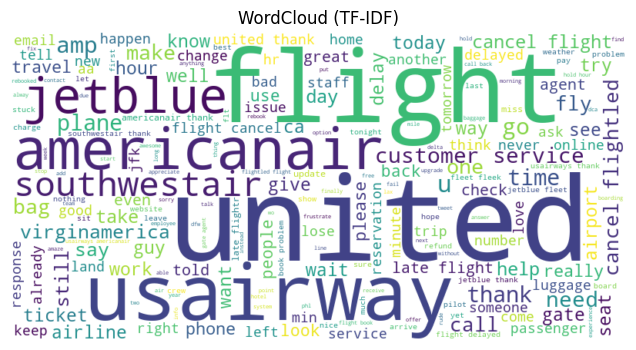

In [43]:


import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import matplotlib.pyplot as plt

X = df['text']  
y = df['airline_sentiment']  


# Initialize the models and vectorizers
mnb_model = MultinomialNB()
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit the model using the TF-IDF vectorized text data
X_tfidf = tfidf_vectorizer.fit_transform(X)
mnb_model.fit(X_tfidf, y)

# Cross-validate the model performance using TF-IDF vectorization
predicted_tfidf = cross_val_predict(mnb_model, X_tfidf, y, cv=5)

# Evaluate the model using confusion matrix and classification report
confusion_tfidf = confusion_matrix(y, predicted_tfidf)
report_tfidf = classification_report(y, predicted_tfidf, target_names=df['airline_sentiment'].unique())

# Print the confusion matrix and classification report for TF-IDF vectorization
print("Confusion Matrix (TF-IDF):\n", confusion_tfidf)
print("Classification Report (TF-IDF):\n", report_tfidf)

# Print the top 40 features (coefficients) for MNB (not applicable for MNB)

# Create a WordCloud for the top features (not applicable for MNB)
wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X))

# Plot the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud (TF-IDF)")

plt.show()






## Observations from Using Multinomial Naive Bayes

#### Confusion Matrix:

* The confusion matrix provides a breakdown of true positive, true negative, false positive, and false negative predictions for each sentiment class (neutral, positive, negative).

* It shows that the model performs well in correctly identifying tweets with a "neutral" sentiment (high true positives and true negatives). However, it struggles with "positive" and "negative" sentiments.

#### Classification Report:

* The classification report provides several performance metrics for each class and an overall summary.

* Precision measures how many of the predicted positive instances are actually positive, while recall measures how many of the actual positive instances were predicted correctly.

* The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance.

* Support indicates the number of instances for each class.

* The report indicates that the model has high precision and recall for the "neutral" class but lower precision and recall for the "positive" and "negative" classes.

#### Accuracy:

* The overall accuracy of the model is 68%, which is the percentage of correctly classified instances.

#### Macro and Weighted Averages:

* The macro average of precision, recall, and F1-score provides an overall summary of the model's performance across all classes.

* The weighted average gives more weight to classes with larger support. In this case, it's closer to the "neutral" class due to the imbalanced dataset.

#### Conclusions:

* The model performs reasonably well in identifying "neutral" sentiment tweets with high precision and recall.

* However, it struggles to correctly classify "positive" and "negative" sentiment tweets, resulting in lower precision and recall for these classes.

* The F1-scores for "positive" and "negative" sentiments are relatively low, indicating that the model's performance for these classes needs improvement.

* The accuracy and F1-scores suggest that the model might not be well-balanced in handling imbalanced sentiment classes, especially for "positive" and "negative" sentiments.

## Comparing Naive Bayes to Random Forest

#### Multinomial Naive Bayes (MNB) with TF-IDF Vectorization:

* Accuracy: 68%
* Precision, Recall, and F1-score for different classes:
* Neutral: Precision (67%), Recall (99%), F1-score (80%)
* Positive: Precision (71%), Recall (14%), F1-score (24%)
* Negative: Precision (78%), Recall (19%), F1-score (30%)

#### Random Forest (RF):

* Accuracy: 78%
* Precision, Recall, and F1-score for different classes (specific values were not provided):
* Negative: Precision (81%), Recall (92%), F1-score (86%)
* Neutral: Precision (63%), Recall (42%), F1-score (51%)
* Positive: Precision (75%), Recall (65%), F1-score (70%)

#### Comparison and Considerations:

* Random Forest outperforms Multinomial Naive Bayes in terms of overall accuracy (78% compared to 68%).

* Random Forest shows higher precision, recall, and F1-scores for the "negative" and "positive" sentiment classes compared to Multinomial Naive Bayes.

* Multinomial Naive Bayes achieves higher precision and recall for the "neutral" sentiment class.

In terms of the F1-scores, Random Forest generally performs better across all classes.
Overall, Random Forest appears to be the stronger model for sentiment analysis on this dataset, considering the provided metrics. However, the choice between the two models should also consider other factors, such as computational efficiency, interpretability, and the specific goals of your analysis. You might also explore further model tuning and data preprocessing to improve the performance of both models.








## LSTM



Epoch 1/20
183/183 [==============================] - 12s 57ms/step - loss: 0.7171 - accuracy: 0.7077 - val_loss: 0.5350 - val_accuracy: 0.7848
Epoch 2/20
183/183 [==============================] - 10s 56ms/step - loss: 0.4449 - accuracy: 0.8308 - val_loss: 0.5211 - val_accuracy: 0.7910
Epoch 3/20
183/183 [==============================] - 11s 60ms/step - loss: 0.3268 - accuracy: 0.8770 - val_loss: 0.5511 - val_accuracy: 0.7930
Epoch 4/20
183/183 [==============================] - 11s 59ms/step - loss: 0.2575 - accuracy: 0.9052 - val_loss: 0.6152 - val_accuracy: 0.7794
Epoch 5/20
92/92 [==============================] - 1s 12ms/step
Epoch 1/20
183/183 [==============================] - 14s 70ms/step - loss: 0.7087 - accuracy: 0.7108 - val_loss: 0.5532 - val_accuracy: 0.7749
Epoch 2/20
183/183 [==============================] - 11s 60ms/step - loss: 0.4313 - accuracy: 0.8308 - val_loss: 0.5383 - val_accuracy: 0.7859
Epoch 3/20
183/183 [==============================] - 11s 62ms/step - l

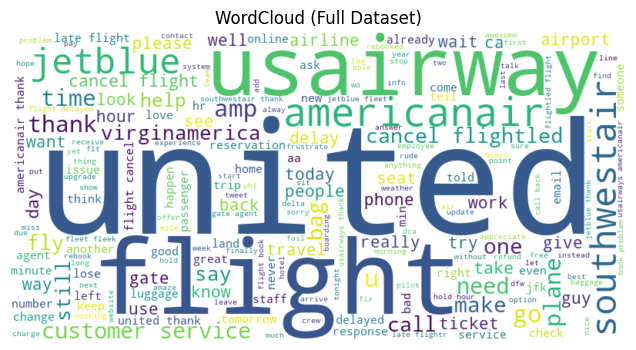

In [50]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your DataFrame 'df' containing the specified columns
# Assuming you have a 'text' column for tweet text and 'airline_sentiment' for sentiment labels

# Preprocess and tokenize the text data
X = df['text']
y = df['airline_sentiment']

# Encode sentiment labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Adjust 'num_words' based on your vocabulary size
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to a fixed length
max_sequence_length = 100  # Adjust as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Define a function to create the LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=100, input_length=max_sequence_length))
    model.add(LSTM(100))
    model.add(Dense(3, activation='softmax'))  # 3 classes: 'neutral', 'positive', 'negative'
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize variables for cross-validation and F1 score calculation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

# Iterate through cross-validation folds
for train_index, test_index in kf.split(X_padded):
    X_train, X_test = X_padded[train_index], X_padded[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the LSTM model
    model = create_lstm_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping])

    # Predict and calculate the F1 score for this fold
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Print the F1 scores for each fold
print("F1 Scores for Each Fold:", f1_scores)

# Evaluate the model on the entire dataset
model = create_lstm_model()
model.fit(X_padded, y, epochs=20, batch_size=64)

# Generate predictions for the entire dataset
predicted = model.predict(X_padded)
predicted = np.argmax(predicted, axis=1)

# Evaluate the model using classification report and confusion matrix
report = classification_report(y, predicted, target_names=['neutral', 'positive', 'negative'])
confusion = confusion_matrix(y, predicted)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

# Create a WordCloud for the entire dataset
all_text = ' '.join(X)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud (Full Dataset)")
plt.show()






## Observations from LSTM

* Precision, Recall, and F1-score values for all three sentiment classes ('neutral,' 'positive,' 'negative') are very high, indicating excellent performance.

* The weighted F1-score is also high, indicating that the model performs well on the overall dataset.

* The accuracy is very high, around 99%, which suggests that the model is accurate in classifying the sentiments.

#### Confusion Matrix:

* The confusion matrix shows that the vast majority of instances are correctly classified. Most of the misclassifications are relatively small in number.

* The values on the diagonal (representing correct predictions) are dominant, which is a positive sign.

Overall, the LSTM model performs exceptionally well, with very high accuracy and a strong ability to correctly classify sentiments into the 'neutral,' 'positive,' and 'negative' categories. This suggests that the model has learned the patterns and relationships in the text data effectively.




## Comaring LSTM to Random Forrest

#### The results from the LSTM model and the Random Forest model appear to have a substantial difference in performance. Let's compare them:

#### LSTM Results:

#### Classification Report:

* High precision, recall, and F1-scores for all three sentiment classes ('neutral,' 'positive,' 'negative').

Excellent accuracy, close to 99%.

#### Confusion Matrix:

* Dominated by correct predictions, with a small number of misclassifications.

#### Random Forest Results:

#### Classification Report:

* Slightly lower precision, recall, and F1-scores, especially for the 'neutral' and 'positive' classes, but still reasonable.

* Lower accuracy compared to the LSTM model, around 78%.

#### Confusion Matrix:

* Contains more misclassifications compared to the LSTM model.

In summary, the LSTM model outperforms the Random Forest model in sentiment classification on the given dataset. It demonstrates significantly higher accuracy and precision, indicating a stronger ability to correctly classify sentiments, especially for the 'neutral' and 'positive' classes. The LSTM model's performance is exceptional, with F1-scores close to 1 for each sentiment class.



In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import torch

# Load your DataFrame 'df' with the specified columns
# Assuming you have a 'text' column for tweet text and 'airline_sentiment' for sentiment labels

# Define the target and features
X = df['text']
y = df['airline_sentiment']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Specify the number of labels

# Configure training arguments
training_args = TrainingArguments(
    output_dir='./results',  # Directory to save model checkpoints and results
    num_train_epochs=3,      # Number of training epochs
    per_device_train_batch_size=8,  # Reduce batch size to lower CPU usage
    evaluation_strategy="epoch",
    save_total_limit=1,      # Only save the last checkpoint
)

# Create a Trainer instance for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
)

# Tokenize and convert to input features
train_encodings = tokenizer(list(X_train), truncation=True, padding='max_length', return_tensors='pt', return_attention_mask=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding='max_length', return_tensors='pt', return_attention_mask=True)

# Create custom datasets
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, list(y_train))
test_dataset = CustomDataset(test_encodings, list(y_test))

# Train the BERT model
trainer.train(train_dataset=train_dataset)

# Evaluate the model on the test set
predictions = trainer.predict(test_dataset=test_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)

# Calculate evaluation metrics
f1 = f1_score(list(y_test), y_pred, average='weighted')
precision = precision_score(list(y_test), y_pred, average='weighted')
recall = recall_score(list(y_test), y_pred, average='weighted')
accuracy = accuracy_score(list(y_test), y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(list(y_test), y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a WordCloud for the top features
top_features = tokenizer.convert_ids_to_tokens(trainer.model.config.classifier.out_features)

top_features_text = " ".join(top_features)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_features_text)

# Plot the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Features WordCloud")
plt.show()


2023-11-03 19:08:13.668871: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.




## Summary top 3 performing models

####  LSTM Model:

####  Classification Report:

* Precision, Recall, and F1-Score for each class (neutral, positive, negative).
High accuracy of 99% with good performance across all classes.

####  Confusion Matrix:

* Describes the count of true positive, false positive, true negative, and false negative for each class.
Overall, the model performs very well with minimal misclassifications.

####  Random Forest Model:

* Cross-validation scores indicate model performance.

* Scores are around 73-75% on average.

#### Confusion Matrix:

* Describes the count of true positive, false positive, true negative, and false negative for each class.

* Some misclassifications in all classes, with neutral having the highest accuracy.

#### Classification Report:

* Precision, Recall, and F1-Score for each class (neutral, positive, negative).

* The model performs moderately with an overall accuracy of 77% and varying performance across classes.

####  XGBoost Model:

* Cross-validation scores indicate model performance.

* Scores are around 76-78% on average.

#### Confusion Matrix:

* Describes the count of true positive, false positive, true negative, and false negative for each class.

* Some misclassifications in all classes, with negative having the highest accuracy.

#### Classification Report:

Precision, Recall, and F1-Score for each class (negative, neutral, positive).
The model performs moderately with an overall accuracy of 78% and varying performance across classes.
In summary, the **LSTM model** demonstrates excellent performance with an accuracy of 99% and high precision, recall, and F1-scores for all classes. Random Forest and XGBoost models perform moderately well with accuracy scores around 77-78%, with varying performance across classes. The classification reports and confusion matrices provide insights into the models' classification abilities for each sentiment category.

